# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


# EDA example - Marketing analytics

<div>
<img src="images/marketing.PNG" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
id1 = "316087337"
id2 = "209056225"
id3 = "208685842"
id4 = "208006965"

In [3]:
df = pd.DataFrame([id1,id2,id3,id4])

In [4]:
df.to_clipboard(index=False,header=False)

Please fill your names here:

Noa Bar Nov

Shir Gonen

Koral Yehizkia

Eden Cohen

In [5]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data.csv'
data_comp = pd.read_csv(url)

In [6]:
data = data_comp.copy()

In [7]:
data.shape

(896, 23)

In [8]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


# Wrangling data

#### 1.1 Fix columns

In [9]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

Replacing missing to NaN's for conveniency

In [10]:
data.isnull().sum().sort_values(ascending=False)

ram_gb             25
ram_type           25
processor_name      1
brand               0
display_size        0
ratings             0
star_rating         0
discount            0
old_price           0
latest_price        0
msoffice            0
Touchscreen         0
warranty            0
graphic_card_gb     0
weight              0
model               0
os_bit              0
os                  0
hdd                 0
ssd                 0
processor_gnrtn     0
processor_brand     0
reviews             0
dtype: int64

In [11]:
data = data.replace('Missing' , np.nan)

#### 1.2 Missing values

In [12]:
data.isnull().sum().sort_values(ascending=False)

processor_gnrtn    314
os                  72
ram_gb              25
ram_type            25
processor_name       1
brand                0
warranty             0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
graphic_card_gb      0
display_size         0
weight               0
model                0
os_bit               0
hdd                  0
ssd                  0
processor_brand      0
reviews              0
dtype: int64

לבדוק ש25 בשתי ההעמודות הם לא אותן השורות

In [38]:
data[(data['ram_gb'].values == np.nan) & (data['ram_type'].values == np.nan)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews


<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

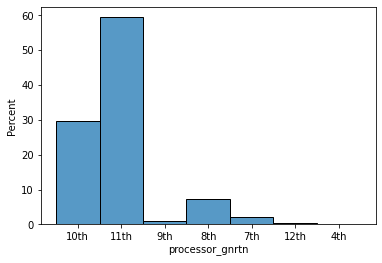

In [13]:
sns.histplot(data = data, x= 'processor_gnrtn', stat = 'percent')

להחליט אם לרשום פה משהו לגבי הכנסת ערכים חסרים, אולי להגיד שאין פה חוקיות

In [14]:
data.os.unique()

array(['Windows', 'Mac', nan], dtype=object)

<AxesSubplot:xlabel='os', ylabel='Percent'>

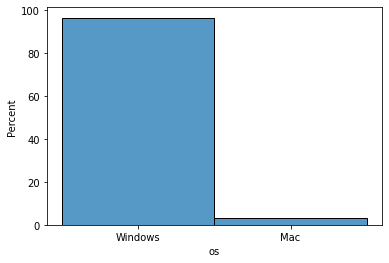

In [15]:
sns.histplot(data = data, x= 'os', stat = 'percent')

we can see that most of the computers contains Windows os so we will replace the missing values with windows values (לא ישנה את הסטטיסטיקה)

In [16]:
data['os'] = data['os'].fillna('Windows')


In [17]:
data.os.unique()

array(['Windows', 'Mac'], dtype=object)

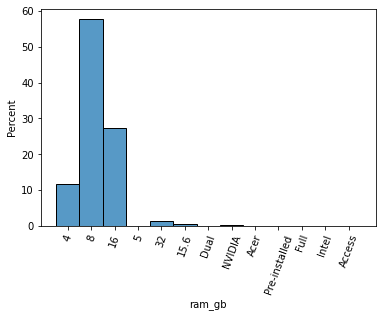

In [18]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

we can see that there are some wrong data that got in the column so we will drop out the wrong rows
15.6 is screen size
also, Dual, NVIDIA, Acer, intel is companies

we will find the rows that we aren't sure about them
5, Pre-installed, Full, Access

In [19]:
#data[data['ram_gb'].str.contains('Pre-installed')]

In [20]:
data[(data['ram_gb'].values == 'Pre-installed') | (data['ram_gb'].values == 'Full') | (data['ram_gb'].values == 'Access') | (data['ram_gb'].values == '5')]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
21,acer,Aspire,Intel,i5,NaN,5,DDR5,0,0,Windows,...,0,0,No,No,50990,89999,43,4.4,10966,1185
710,MSI,GS,512,GB SSD,NaN,Pre-installed,Windows,0,0,Windows,...,8th,0,No,No,149990,169990,11,4.1,10,3
769,Lenovo,Legion,Pre-installed,Genuine Windows,NaN,Full,LED,0,0,Windows,...,0,0,No,No,77890,110890,29,4.4,208,57
846,HP,Chromebook,64,GB eMMC,NaN,Access,Apps,0,0,Windows,...,0,0,No,No,61745,0,0,4.6,23,4


we will drop the folowing rows because we can see false information also in cloumn processor_brand.
בשורות שיש להם ערכים מספריים בעמודה של המותג. 

In [31]:
dorp_preinstalled_index = data.loc[data.ram_gb == 'Pre-installed'].index
dorp_access_index = data.loc[data.ram_gb == 'Access'].index
dorp_156_index = data.loc[data.ram_gb == '15.6'].index
dorp_dual_index = data.loc[data.ram_gb == 'Dual'].index
dorp_nvidia_index = data.loc[data.ram_gb == 'NVIDIA'].index
dorp_acer_index = data.loc[data.ram_gb == 'Acer'].index
dorp_intel_index = data.loc[data.ram_gb == 'Intel'].index
data.drop(dorp_preinstalled_index,inplace = True)
data.drop(dorp_access_index,inplace = True)
data.drop(dorp_156_index,inplace = True)
data.drop(dorp_dual_index,inplace = True)
data.drop(dorp_nvidia_index,inplace = True)
data.drop(dorp_acer_index,inplace = True)
data.drop(dorp_intel_index,inplace = True)

In [32]:
data.shape

(883, 23)

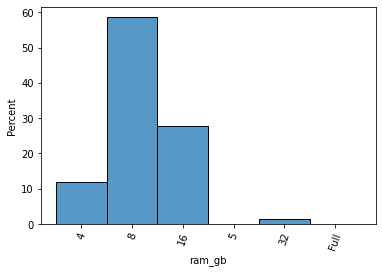

In [33]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

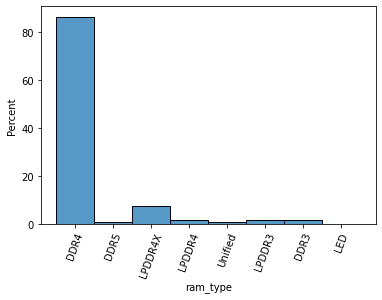

In [34]:
sns.histplot(data = data, x= 'ram_type', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

we can see that most of the computers contains Windows os so we will replace the missing values with windows values (לא ישנה את הסטטיסטיקה)

In [43]:
data['ram_type'] = data['ram_type'].fillna('DDR4')

In [46]:
data['ram_type'].isnull().sum()

0

In [ ]:
sns.histplot(data = data, x= 'ram_type', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()
#על מנת לראות את השינויים שיתווצרו לנו כתוצאה מהפיכת הערכים החסרים לערכי דידיאר 4 נצטרך לשנות את קנה המידה הנמצא בציר וואי וואי ליחידות מידה קטנות יותר 

In [48]:
data[(data['processor_name'].values == np.nan)]


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews


In [50]:
data['processor_name'].unique()

array(['Celeron Dual', 'Core i3', 'Core i5', 'Ryzen 3', 'Ryzen 5',
       'M1 Processor', 'Pentium Silver', 'i5', 'Core i7', 'Hexa Core',
       nan, 'Ryzen 7', 'i7', 'Pentium Quad', '5', 'Ryzen 9', 'Core i9',
       'APU Dual', 'Quad', 'M1 Pro', 'M1 Max', 'Core',
       'MediaTek Kompanio', 'A6-9225 Processor', 'Snapdragon 7c',
       'Dual Core', 'GEFORCE RTX', 'Athlon Dual', 'Genuine Windows',
       'Core m3'], dtype=object)

In [53]:
data[data['processor_name'] == nan]

NameError: name 'nan' is not defined